# Project: Investigate TMDB 5000 Movie Data Set (from Kaggle)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project will examine a dataset related to 5000 movies released from 1916 - 2017. The data comes from The Movie Database (TMDB) and was made available on Kaggle at https://www.kaggle.com/tmdb/tmdb-movie-metadata.

The dataset consists of two csv files. The first file 'tmdb_5000_movies.csv' consists of movie titles, release dates, production information, popularity ratings and a  variety of metadata. The second file 'tmdb_5000_credits.csv' includes information about cast and crew for the same set of movies. Both files include an index column which will be used as a key to relate data in the respective files.

Potential research questions are:
- is there a correlation between budget and user ratings/popularity.
- what are the percentages of male and female cast members?
- what are percentages of male and female directors over time?
- what are the percentages of male and female crew members over time?
- on an annual basis what are the percentages of movies per genre

Selection of one or more research questions for deeper investigaton will be made after completing exploratory data analysis.  We will then trim and prepare the data for analysis and visualization.

Exploratory data analysis tasks include:
- Understand the date ranges for this database
- Count the number of  duplicate rows (movies)
- Research the basis for fields such as "popularity" which are not immediately apparent.

Some background information about fields:
- Popularity is defined here
    - https://www.themoviedb.org/talk/5141d424760ee34da71431b0
    - https://developers.themoviedb.org/3/getting-started/popularity
- vote_average is defined here
    - https://www.themoviedb.org/talk/57c5cbba9251415e00000137


In [169]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import json
import numpy as np
import pandas as pd
# import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
% matplotlib inline
import calendar
import datetime

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [170]:
# These are helper functions for loading data in nested json fields as indicated by Kaggle: https://www.kaggle.com/sohier/tmdb-format-introduction

def load_tmdb_movies(path):
    df = pd.read_csv(path)
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df


def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

In [171]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

movies = load_tmdb_movies('tmdb_5000_movies.csv')
credits = load_tmdb_credits('tmdb_5000_credits.csv')

In [172]:
# field info for the movies file
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [173]:
# field info for the credits file
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [174]:
# tmdb_5000_movies.csv first 5 rows
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In the next several cells we will examine the contents and properties of the nested JSON data in the two different files.

In [175]:
# keys in the genres field in the movies file
print(sorted(movies.genres.iloc[0][0].keys()))

['id', 'name']


In [176]:
# values for Avatar in the genres field in the movies file
[genre['name'] for genre in movies['genres'].iloc[0][:5]]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [269]:
# keys in the keywords field in the movies files
print(sorted(movies.keywords.iloc[0][0].keys()))

['id', 'name']


In [178]:
# values (for Avatar) in the keyword field in the movies file
[keywords['name'] for keywords in movies['keywords'].iloc[0][:5]]

['culture clash', 'future', 'space war', 'space colony', 'society']

In [179]:
# keys in the production_companies field in the movies file
print(sorted(movies.production_companies.iloc[0][0].keys()))

['id', 'name']


In [180]:
# values (for Avatar) in the production_companies field in the movies file
[production_company['name'] for production_company in movies['production_companies'].iloc[0][:5]]

['Ingenious Film Partners',
 'Twentieth Century Fox Film Corporation',
 'Dune Entertainment',
 'Lightstorm Entertainment']

In [181]:
# keys in the production_countries field in the the movies file
print(sorted(movies.production_countries.iloc[0][0].keys()))

['iso_3166_1', 'name']


In [182]:
# values (for Avatar) in the production_countries field in the movies file
[production_country['name'] for production_country in movies['production_countries'].iloc[0][:5]]

['United States of America', 'United Kingdom']

In [183]:
# keys in the spoken_languages field in the movies file
print(sorted(movies.spoken_languages.iloc[0][0].keys()))

['iso_639_1', 'name']


In [184]:
# values (for Avatar) for the spoken_languages field in the movies file
[spoken_language['name'] for spoken_language in movies['spoken_languages'].iloc[0][:5]]

['English', 'Español']

In [185]:
# credits.csv (second csv included in this dataset) first five rows
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [186]:
# keys for the cast field in the credits file
print(sorted(credits.cast.iloc[0][0].keys()))
# note that these fields are more than simple key value pairs. They are really entire dictionaries themselves

['cast_id', 'character', 'credit_id', 'gender', 'id', 'name', 'order']


In [187]:
# values for the first five instances of the 'name' field in the cast JSON. These are the stars of Avatar
[actor['name'] for actor in credits['cast'].iloc[0][:5]]
# it is noted somewhere with the Kaggle data that the crew is presented in order of appearance in credits.

['Sam Worthington',
 'Zoe Saldana',
 'Sigourney Weaver',
 'Stephen Lang',
 'Michelle Rodriguez']

In [188]:
# keys for the crew field in the credits file
print(sorted(credits.crew.iloc[0][0].keys()))

['credit_id', 'department', 'gender', 'id', 'job', 'name']


In [270]:
# value for the first 80 instances of the job 'field' in the 'crew' JSON.
[crew['job'] for crew in credits['crew'].iloc[0][:80]]
# Note that unlike the cast data, there is no discernible order to the crew presentation.

['Editor',
 'Production Design',
 'Sound Designer',
 'Supervising Sound Editor',
 'Casting',
 'Original Music Composer',
 'Director',
 'Writer',
 'Editor',
 'Producer',
 'Screenplay',
 'Art Direction',
 'Visual Effects Producer',
 'Casting',
 'Supervising Art Director',
 'Music Editor',
 'Sound Effects Editor',
 'Foley',
 'Foley',
 'Costume Design',
 'Producer',
 'Art Direction',
 'Set Decoration',
 'Supervising Art Director',
 'Set Designer',
 'Executive Producer',
 'Costume Design',
 'Director of Photography',
 'Set Designer',
 'Stunts',
 'Makeup Artist',
 'Hairstylist',
 'Camera Operator',
 'Art Direction',
 'Visual Effects Supervisor',
 'Visual Effects Editor',
 'Editor',
 'Set Designer',
 'Director of Photography',
 'Stunts',
 'Visual Effects Supervisor',
 'Dialect Coach',
 'Art Direction',
 'Art Direction',
 'Art Direction',
 'Motion Capture Artist',
 'Stunt Coordinator',
 'Visual Effects Supervisor',
 'Supervising Art Director',
 'Supervising Art Director',
 'Casting',
 'Product

In [284]:
# in this and the next cell, we look in detail at the cells containing JSON dictionaries in credits - Cast, Crew
# looking at the Cast dictionary within the Credits dataframe
credits.loc[0,'cast']
# this is a lot of info. But since this is the data we are most likely to work with, wanted to present it here.

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [191]:
# looking at the Crew dictionary within the Credits dataframe
credits.loc[0,'crew']
# this is a lot of info. Same comment applies as above

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

That was a little tedious, sorry, I am a little bored myself! However, since it will take a bit of work to unpack the JSON, it was important to take a close look first. We will  unpack the JSON fields as needed later in the notebook.

### Duplicates

Let's examine the files for duplicates since duplicates are one way in which a dataset can be "dirty."

In [192]:
# Lets count the number of duplicates in moviews <'tmdb_5000_movies.csv'>
names1 = movies.original_title.value_counts()
names1[names1 > 1]

Out of the Blue    2
Batman             2
Name: original_title, dtype: int64

In [193]:
# Lets count the number of duplicates in credits <'tmdb_5000_credits.csv'>
names2 = credits.title.value_counts()
names2[names2 > 1]

Out of the Blue    2
Batman             2
The Host           2
Name: title, dtype: int64

In [194]:
# Looks like the duplicates are very few and are almost the same in both files.
# Let's take a look at these rows to see if they are truly duplicates or just movies with the same title
# Grab DataFrame rows where column has certain values
valuelist = ['The Host', 'Batman', 'Out of the Blue']
df3 = movies[movies.original_title.isin(valuelist)]
df3
# Looking at the values that are visible here, it is clear these are not duplicates.

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
972,44000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,72710,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,The Host,A parasitic alien soul is injected into the bo...,42.933027,"[{'name': 'Nick Wechsler Productions', 'id': 8...","[{'iso_3166_1': 'US', 'name': 'United States o...",2013-03-22,63327201,125.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You will be one of us,The Host,6.0,1817
1359,35000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",NaN,268,"[{'id': 848, 'name': 'double life'}, {'id': 84...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"[{'name': 'PolyGram Filmed Entertainment', 'id...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1989-06-23,411348924,126.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Have you ever danced with the devil in the pal...,Batman,7.0,2096
3647,0,"[{'id': 18, 'name': 'Drama'}]",NaN,39269,"[{'id': 4470, 'name': 'punk'}, {'id': 10183, '...",en,Out of the Blue,Dennis Hopper is a hard-drinking truck driver ...,0.679351,"[{'name': 'Robson Street', 'id': 71953}]","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",1980-05-01,0,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A harrowing drama from the director of Easy Rider,Out of the Blue,6.5,17
3693,0,"[{'id': 18, 'name': 'Drama'}]",NaN,10844,"[{'id': 2658, 'name': 'new zealand'}, {'id': 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{'iso_3166_1': 'NZ', 'name': 'New Zealand'}]",2006-10-12,0,103.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The true story of a small town massacre,Out of the Blue,5.9,18
4267,1377800,"[{'id': 10751, 'name': 'Family'}, {'id': 12, '...",NaN,2661,"[{'id': 339, 'name': 'submarine'}, {'id': 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1966-07-30,0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203


In [195]:
# let's look at the duplicates in the other file
valuelist = ['The Host', 'Batman', 'Out of the Blue']
df4 = credits[credits.title.isin(valuelist)]
df4
# This cell also did not print clearly, but it is also clear these are not duplicates.
# I'm a little curious why "The Host" appeared as a duplicate in the credits file and not movies,
# but since it's only two rows, I'm not going to investigate

,movie_id,title,cast,crew
972,72710,The Host,"[{'cast_id': 52, 'character': 'Melanie Stryder...","[{'credit_id': '52fe487bc3a368484e0fa919', 'de..."
1359,268,Batman,"[{'cast_id': 5, 'character': 'Jack Napier/The ...","[{'credit_id': '52fe422fc3a36847f800aa4b', 'de..."
2877,1255,The Host,"[{'cast_id': 3, 'character': 'Park Gang-du', '...","[{'credit_id': '52fe42eac3a36847f802ca6b', 'de..."
3647,39269,Out of the Blue,"[{'cast_id': 2, 'character': 'Don', 'credit_id...","[{'credit_id': '52fe47099251416c9106826f', 'de..."
3693,10844,Out of the Blue,"[{'cast_id': 12, 'character': 'Nick Harvey', '...","[{'credit_id': '52fe43c19251416c7501cceb', 'de..."
4267,2661,Batman,"[{'cast_id': 17, 'character': 'Batman / Bruce ...","[{'credit_id': '52fe4363c3a36847f80509a7', 'de..."


### Time Distribution of Movies in TMDB Dataset

The next several cells examine the distribution of movies by release date and year. This is important because the Kaggle dataset does not have any explanation of how this set of ~5000 films was selected. With the data exploration we have done so far, we do not even know when the earliest and most recent movies were released.  Understanding how the movies are distributed over time will enable us to see what kind of deeper analysis are possible with this particular selection of movies.

In [196]:
# Sort by Release Date to see release dates of earliest movies in dataset
movies = movies.sort_values('release_date')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4592,385907,"[{'id': 18, 'name': 'Drama'}]",NaN,3059,"[{'id': 279, 'name': 'usa'}, {'id': 2487, 'nam...",en,Intolerance,"The story of a poor young woman, separated by ...",3.232447,"[{'name': 'Triangle Film Corporation', 'id': 1...","[{'iso_3166_1': 'US', 'name': 'United States o...",1916-09-04,8394751,197.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Cruel Hand of Intolerance,Intolerance,7.4,60
4661,245000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,3060,"[{'id': 2504, 'name': 'world war i'}, {'id': 1...",en,The Big Parade,The story of an idle rich boy who joins the US...,0.785744,"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...","[{'iso_3166_1': 'US', 'name': 'United States o...",1925-11-05,22000000,151.0,[],Released,NaN,The Big Parade,7.0,21
2638,92620000,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",NaN,19,"[{'id': 312, 'name': 'man vs machine'}, {'id':...",de,Metropolis,In a futuristic city sharply divided between t...,32.351527,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1927-01-10,650422,153.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,There can be no understanding between the hand...,Metropolis,8.0,657
4457,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,905,"[{'id': 212, 'name': 'london england'}, {'id':...",de,Die Büchse der Pandora,The rise and inevitable fall of an amoral but ...,1.824184,"[{'name': 'Nero Films', 'id': 4903}]","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1929-01-30,0,109.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Pandora's Box,7.6,45
4594,379000,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,65203,"[{'id': 4344, 'name': 'musical'}, {'id': 10229...",en,The Broadway Melody,"Harriet and Queenie Mahoney, a vaudeville act,...",0.968865,"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...","[{'iso_3166_1': 'US', 'name': 'United States o...",1929-02-08,4358000,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The pulsating drama of Broadway's bared heart ...,The Broadway Melody,5.0,19


In [197]:
# Sort by Release Date to see release dates of latest movies in dataset
movies.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4720,8500000,"[{'id': 18, 'name': 'Drama'}]",http://www.foxsearchlight.com/thebirthofanation/,339408,"[{'id': 2831, 'name': 'slavery'}]",en,The Birth of a Nation,"Nat Turner, a former slave in America, leads a...",9.452808,"[{'name': 'Phantom Four', 'id': 423}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-09-09,15861566,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Untold Story of Nat Turner,The Birth of a Nation,6.5,178
3302,8000000,"[{'id': 18, 'name': 'Drama'}]",NaN,374461,"[{'id': 1650, 'name': 'cook'}, {'id': 6054, 'n...",en,Mr. Church,A unique friendship develops when a little gir...,7.828459,"[{'name': 'Envision Media Arts', 'id': 19456},...","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-09-16,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He was the one person she could always count on.,Mr. Church,7.0,129
3408,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,325373,"[{'id': 1415, 'name': 'small town'}, {'id': 46...",en,Two Lovers and a Bear,Set in a small town near the North Pole where ...,3.139294,[],[],2016-10-02,0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Two Lovers and a Bear,6.8,27
4255,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",http://www.growingupsmithmovie.com,426469,[],en,Growing Up Smith,"In 1979, an Indian family moves to America wit...",0.710870,[],[],2017-02-03,0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It’s better to stand out than to fit in.,Growing Up Smith,7.4,7
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.000000,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


In [271]:
# Here we are counting movies in the TMDB database by release year and displaying the count
movies['release_year'] = movies['release_date'].str[:4]
df4 = movies['release_year'].value_counts().reset_index() #count the number of movies released per year
df4.columns = ['release_year', 'count'] #create new dataframe with release_year and the count of movies released
df4 = df4.sort_values(by = 'release_year', ascending=1)#sort the new dataframe by release year
with pd.option_context('display.max_rows', None, 'display.max_columns', 3): # allows Jupyter Notebook to display entire df
    print (df4.to_string(index=False)) # suppresses the index in the printout

release_year  count
       1916      1
       1925      1
       1927      1
       1929      2
       1930      1
       1932      1
       1933      2
       1934      1
       1935      1
       1936      2
       1937      2
       1938      2
       1939      3
       1940      5
       1941      1
       1942      2
       1944      2
       1945      4
       1946      3
       1947      3
       1948      3
       1949      2
       1950      1
       1951      3
       1952      4
       1953      4
       1954      4
       1955      2
       1956      3
       1957      2
       1958      1
       1959      3
       1960      3
       1961      5
       1962      7
       1963      8
       1964     10
       1965      8
       1966      6
       1967      4
       1968     10
       1969     10
       1970     12
       1971     10
       1972      9
       1973      9
       1974      8
       1975      6
       1976      9
       1977     16
       1978     14
       1979

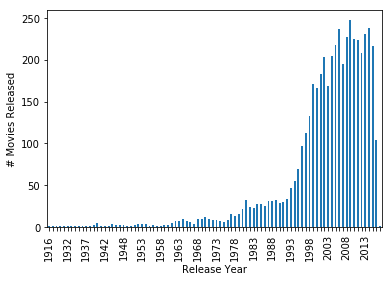

In [272]:
# The following visualization plots the same data (year-by-year count of movies in the TMDB database) as a histogram.
# df4.plot.hist('release_year') 
ax = df4.plot(x='release_year', y='count', kind='bar',legend=False)
# ax.set_xlim((1916, 2017))
ax.set_xlabel("Release Year")
ax.set_ylabel("# Movies Released")
n = 5  # Keeps every 7th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
# plt.tight_layout()
plt.show()


#### Time Analysis - Conclusions

Ok, that was valuable! We learned that while the dataset includes movies from the silent film era right up to this calendar year, the majority of films (and highest annual numbers) are from 1997-2016.  For any exploration of aggregate data, I plan to restrict the time period accordingly.

### Checking Key Values in the Movies and Credits Dataframes

This is also going to be tedious. In the following several cells, I will be checking the "ID" field in the movies df and the "movie_id" field in Credits to verify that these values are identical for any movie. If they are, we can use these as the key value to "join" or "merge" the two dataframes.

In [273]:
# As noted above, we are running some tests of movies from various time periods to make sure the "id" and "movie_id"
#   fields in each file are indexing the same movie.
movies.loc[movies['id'] == 935]


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year
4173,1800000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,935,"[{'id': 840, 'name': 'usa president'}, {'id': ...",en,Dr. Strangelove or: How I Learned to Stop Worr...,Insane General Jack D. Ripper initiates a nucl...,41.996783,"[{'name': 'Hawk Films', 'id': 88}, {'name': 'C...",...,1964-01-29,9440272,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The hot-line suspense comedy,Dr. Strangelove or: How I Learned to Stop Worr...,8.0,1442,1964


In [201]:
credits.loc[credits['movie_id'] == 935]

,movie_id,title,cast,crew
4173,935,Dr. Strangelove or: How I Learned to Stop Worr...,"[{'cast_id': 13, 'character': 'Group Capt. Lio...","[{'credit_id': '52fe4290c3a36847f802879d', 'de..."


In [202]:
movies.loc[movies['id'] == 238]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year
3337,6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.thegodfather.com/,238,"[{'id': 131, 'name': 'italy'}, {'id': 699, 'na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,1972-03-14,245066411,175.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An offer you can't refuse.,The Godfather,8.4,5893,1972


In [203]:
credits.loc[credits['movie_id'] == 238]

,movie_id,title,cast,crew
3337,238,The Godfather,"[{'cast_id': 5, 'character': 'Don Vito Corleon...","[{'credit_id': '52fe422bc3a36847f80093c9', 'de..."


In [204]:
movies.loc[movies['id'] == 9806]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year
339,92000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://disney.go.com/disneyvideos/animatedfilm...,9806,"[{'id': 1308, 'name': 'secret identity'}, {'id...",en,The Incredibles,Bob Parr has given up his superhero days to lo...,77.817571,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,2004-11-05,631442092,115.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,"No gut, no glory",The Incredibles,7.4,5152,2004


In [205]:
credits.loc[credits['movie_id'] == 9806]

,movie_id,title,cast,crew
339,9806,The Incredibles,"[{'cast_id': 1, 'character': 'Bob Parr / Mr. I...","[{'credit_id': '52fe4531c3a36847f80c159d', 'de..."


In [206]:
movies.loc[movies['id'] == 8587]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year
494,45000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://movies.disney.com/the-lion-king,8587,"[{'id': 2143, 'name': 'loss of parents'}, {'id...",en,The Lion King,A young lion cub named Simba can't wait to be ...,90.457886,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,1994-06-23,788241776,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Life's greatest adventure is finding your plac...,The Lion King,8.0,5376,1994


In [207]:
credits.loc[credits['movie_id'] == 8587]

,movie_id,title,cast,crew
494,8587,The Lion King,"[{'cast_id': 8, 'character': 'Young Simba (voi...","[{'credit_id': '59161a6bc3a36842690252b9', 'de..."


In [208]:
movies.loc[movies['id'] == 259943]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year
3892,0,"[{'id': 18, 'name': 'Drama'}]",NaN,259943,"[{'id': 2692, 'name': 'arranged marriage'}, {'...",zh,归来,Lu and Feng are a devoted couple forced to sep...,6.017273,"[{'name': 'LeVision Pictures', 'id': 20966}]",...,2014-05-16,0,111.0,"[{'iso_639_1': 'zh', 'name': '普通话'}]",Released,NaN,Coming Home,6.9,49,2014


In [209]:
credits.loc[credits['movie_id'] == 259943]

,movie_id,title,cast,crew
3892,259943,Coming Home,"[{'cast_id': 0, 'character': 'Feng Wanyu', 'cr...","[{'credit_id': '5329c7e0c3a3683f86000001', 'de..."


In [210]:
movies.loc[movies['id'] == 703]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year
3739,4000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,703,"[{'id': 2398, 'name': 'narration'}, {'id': 283...",en,Annie Hall,"In the city of New York, comedian Alvy Singer ...",35.892034,"[{'name': 'United Artists', 'id': 60}]",...,1977-04-19,38251425,93.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A nervous romance.,Annie Hall,7.8,1010,1977


In [211]:
credits.loc[credits['movie_id'] == 703]

,movie_id,title,cast,crew
3739,703,Annie Hall,"[{'cast_id': 21, 'character': 'Alvy Singer', '...","[{'credit_id': '52fe426dc3a36847f801dbbd', 'de..."


In [212]:
# This was the cell that I was using to look up the movie_id index for various movies
# credits[credits.values == 'Godfather']
credits[credits['title'].str.contains("Coming Home")]

,movie_id,title,cast,crew
3892,259943,Coming Home,"[{'cast_id': 0, 'character': 'Feng Wanyu', 'cr...","[{'credit_id': '5329c7e0c3a3683f86000001', 'de..."


Though not rigorous, this casual comparison of movies from the two files confirms that the id and movie_id are identical for each movie and can be used to relate the two dataframes.

### Conclusions After Preliminary Data Exploration

It appears that the data in these two files are rather clean. Both files contain the same number of lines (4803) and both contain a movie 'index' which match for the same movie in each file.  The missing values fall into a couple categories. Only a minority of movie listings have a web homepage (1712/4803) and far from all (3959/4803) have a "tagline." However, neither of these fields are critical for any of the research questions under consideration. There are also, surprisingly, no duplicates to speak of.

However, as the movie count and the histogram demonstrate, the temporal distribution of movies is uneven with more movies represented from the most recent twenty years (1997-2016). Since the dataset does not come with any explanation of how the films were selected, we will choose to perform our analysis on the twenty years with more than 100 films/year represented - 1997-2016.  The research question we have chosen is meant to be optimized for this period and for how the movies are distributed.

Another observation is that while the data itself is reasonably "clean", the dataset is nevertheless unwieldy because much interesting information is contained in the JASON files detailed above. Rather than trim at this point, let's consider the research question(s) and create a trimmed file based on the requirements of deeper data analysis.


<a id='eda'></a>
## Exploratory Data Analysis & Data Trimming

### Research Question 1: Percentages of Male/Female Crew Creative Team Members Over Time

Hollywood has been severely criticized as a sexist industry. Recently (in late 2017), focus has fallen on instances of sexual harrassment and assault. For a number of years prior, there have been complaints about the difficulty faced by female actors (even very accomplished ones) in finding substantive roles after passing their twenties or thirties while male actors are often cast in many types of parts (inculding as romantic leads) into their fifties and sixties.

Let's examine another category of Hollywood 'star' - slightly less high-profile, but just as essential for the success of a film. We will define the "creative team" behind a movie as the director and it's writer(s). For the 1977-2016 time period, let's look at the gender splits of 'creative team' members for the top 20 revenue earners in each given year.  This will show us what the percentages are and whether they have changed over the past 20 years.

### Trimming Data
First we will flatten the JSON field for crew members [as detailed in the Kaggle notes](https://www.kaggle.com/sohier/tmdb-format-introduction). As indicated by Kaggle, "nested JSON can be a pain; it often makes sense to use an alternate data structure. "

Second, we will create a new dataframe including only the directors and writers as indicated (i.e., the "creative team," as we have defined it)."

In [274]:
# the following code creates a new dataframe extracted from the JSON field in the crew data frame

#credits.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['cast']], axis=1);
credits.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['crew']], axis=1);
#credits.apply(lambda row: [person.update({'order': order}) for order, person in enumerate(row['crew'])], axis=1);
"""
cast = []
credits.cast.apply(lambda x: cast.extend(x))
cast = pd.DataFrame(cast)
cast['type'] = 'cast'
"""

crew = []
credits.crew.apply(lambda x: crew.extend(x))
crew = pd.DataFrame(crew)
crew['type'] = 'crew'

# people = pd.concat([cast, crew],  ignore_index=True)

In [275]:
crew.sample(3)

,credit_id,department,gender,id,job,movie_id,name,type
27742,530b2e989251411108004c07,Costume & Make-Up,1,60284,Costume Design,13027,Marie-Sylvie Deveau,crew
118728,564f5ff9925141645f00059b,Sound,0,1436795,Dolby Consultant,25376,Ricardo Viñas,crew
10642,59175eaac3a3683a930340e3,Crew,0,1816138,Stand In,7364,Gary Webber,crew


In [276]:
# here we filter on the creative job titles and create a new dataframe called 'creative' with only directors and writers
# creative = crew[crew['job'] == 'Director']
creative = crew[crew.job.isin(['Director', 'Screenplay', 'Writer'])]
creative.sample(5)

,credit_id,department,gender,id,job,movie_id,name,type
86436,52fe46369251416c75070e87,Writing,2,915,Writer,15070,David Giler,crew
39238,52fe45e49251416c7506611b,Writing,2,2199,Screenplay,14306,Scott Frank,crew
18446,52fe45f29251416c91043e65,Writing,0,10782,Screenplay,36557,Neal Purvis,crew
72314,52fe4df6c3a368484e206d55,Directing,2,16919,Director,215211,Olivier Dahan,crew
76105,56964c729251413f820030ed,Writing,2,5143,Screenplay,380,Barry Morrow,crew


Now that we have flattened the crew JSON, filtered the rows for the creative team and made the 'creative' file, let's take a quick look at that file.

In [279]:
# checking the number of records in the file
len(creative['gender'])
# that's slightly fewer than 3 creative team members per movie. Intution says that is about right.

12524

In [280]:
# A crude count of the gender field. Remember, this if for the entire set of 4800 movies.
creative.gender.value_counts()
# Wow - the file is missing a gender value for 25% of the rows!
# Also, only 10% women in the creative positions!!!

2    8674
0    3067
1     783
Name: gender, dtype: int64

Good news here is that we succesfully flattened the data in the crew JSON field and extracted the creatives from that bigger DF.  More concerning is that 3067/12524 of the individuals are reporting no gender. A superficial review of the file shows that most of these folks have a gender-specific name, but at the moment I have no easy way to derive the correct gender. For the time being, we will assume that the male/female percentages are consistent across the 0-value individuals.

### Creation of Merged File for Data Visualization and Analysis

Next tasks will result in creation a merged data file that we can use to solve for the research question and perform data visualization.

First - let's review the two key files - 'creative' and 'movies.'

In [218]:
# let's review the field types of the creative file
creative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12524 entries, 6 to 129580
Data columns (total 8 columns):
credit_id     12524 non-null object
department    12524 non-null object
gender        12524 non-null int64
id            12524 non-null int64
job           12524 non-null object
movie_id      12524 non-null int64
name          12524 non-null object
type          12524 non-null object
dtypes: int64(3), object(5)
memory usage: 880.6+ KB


In [219]:
# now let's do the same for the movies file
movies.info()
# note that since we first looked at it, we added the release_year field and that field is a string

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 4592 to 4553
Data columns (total 21 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-nu

Next task is to subset the movies file and find the 20 highest revenue-earners for each of the 20 years 1997-2016.

In [252]:
# Let's do this first for 1997
# ideally, I would turn this into a function that I could use to convert the remaining years.
# pandas does not allow for filtering on two columns.
movies97 = movies[movies.release_year.isin(['1997'])]
movies97 = movies97.sort_values(by=['revenue'], ascending=False)[:20]
movies97 = movies97[['release_year','original_title', 'revenue','id']]
movies97.reset_index(drop=True, inplace=True)
[movies97]
# cool - it worked!  Here are the 20 highest revenue earners for 1997

[   release_year                 original_title     revenue    id
 0          1997                        Titanic  1845034188   597
 1          1997                   Men in Black   589390539   607
 2          1997            Tomorrow Never Dies   333011068   714
 3          1997                  Air Force One   315156409  9772
 4          1997             As Good as It Gets   314178011  2898
 5          1997       My Best Friend's Wedding   299288605  8874
 6          1997              The Fifth Element   263920180    18
 7          1997                 The Full Monty   257850122  9427
 8          1997                       Face/Off   245676146   754
 9          1997                 Batman & Robin   238207122   415
 10         1997  The Lost World: Jurassic Park   229074524   330
 11         1997              Good Will Hunting   225933435   489
 12         1997                        Con Air   224012234  1701
 13         1997                      Liar Liar   181000000  1624
 14       

In [289]:
# ok - this is not a good coding practice - sue me!
# haven't figured out a way to turn the creation of the 20-highest revenue earners/year into an elegant function 
# or Pandas operation
# this works too, I tested it.

movies98 = movies[movies.release_year.isin(['1998'])]
movies98 = movies98.sort_values(by=['revenue'], ascending=False)[:20]
movies98 = movies98[['release_year','original_title', 'revenue', 'id']]
movies98.reset_index(drop=True, inplace=True)
movies99 = movies[movies.release_year.isin(['1999'])]
movies99 = movies99.sort_values(by=['revenue'], ascending=False)[:20]
movies99 = movies99[['release_year','original_title', 'revenue', 'id']]
movies99.reset_index(drop=True, inplace=True)
movies00 = movies[movies.release_year.isin(['2000'])]
movies00 = movies00.sort_values(by=['revenue'], ascending=False)[:20]
movies00 = movies00[['release_year','original_title', 'revenue', 'id']]
movies00.reset_index(drop=True, inplace=True)
movies01 = movies[movies.release_year.isin(['2001'])]
movies01 = movies01.sort_values(by=['revenue'], ascending=False)[:20]
movies01 = movies01[['release_year','original_title', 'revenue', 'id']]
movies01.reset_index(drop=True, inplace=True)
movies02 = movies[movies.release_year.isin(['2002'])]
movies02 = movies02.sort_values(by=['revenue'], ascending=False)[:20]
movies02 = movies02[['release_year','original_title', 'revenue', 'id']]
movies02.reset_index(drop=True, inplace=True)
movies03 = movies[movies.release_year.isin(['2003'])]
movies03 = movies03.sort_values(by=['revenue'], ascending=False)[:20]
movies03 = movies03[['release_year','original_title', 'revenue', 'id']]
movies03.reset_index(drop=True, inplace=True)
movies04 = movies[movies.release_year.isin(['2004'])]
movies04 = movies04.sort_values(by=['revenue'], ascending=False)[:20]
movies04 = movies04[['release_year','original_title', 'revenue', 'id']]
movies04.reset_index(drop=True, inplace=True)
movies05 = movies[movies.release_year.isin(['2005'])]
movies05 = movies05.sort_values(by=['revenue'], ascending=False)[:20]
movies05 = movies05[['release_year','original_title', 'revenue', 'id']]
movies05.reset_index(drop=True, inplace=True)
movies06 = movies[movies.release_year.isin(['2006'])]
movies06 = movies06.sort_values(by=['revenue'], ascending=False)[:20]
movies06 = movies06[['release_year','original_title', 'revenue', 'id']]
movies06.reset_index(drop=True, inplace=True)
movies07 = movies[movies.release_year.isin(['2007'])]
movies07 = movies07.sort_values(by=['revenue'], ascending=False)[:20]
movies07 = movies07[['release_year','original_title', 'revenue', 'id']]
movies07.reset_index(drop=True, inplace=True)
movies08 = movies[movies.release_year.isin(['2008'])]
movies08 = movies08.sort_values(by=['revenue'], ascending=False)[:20]
movies08 = movies08[['release_year','original_title', 'revenue', 'id']]
movies08.reset_index(drop=True, inplace=True)
movies09 = movies[movies.release_year.isin(['2009'])]
movies09 = movies09.sort_values(by=['revenue'], ascending=False)[:20]
movies09 = movies09[['release_year','original_title', 'revenue', 'id']]
movies09.reset_index(drop=True, inplace=True)
movies10 = movies[movies.release_year.isin(['2010'])]
movies10 = movies10.sort_values(by=['revenue'], ascending=False)[:20]
movies10 = movies10[['release_year','original_title', 'revenue', 'id']]
movies10.reset_index(drop=True, inplace=True)
movies11 = movies[movies.release_year.isin(['2011'])]
movies11 = movies11.sort_values(by=['revenue'], ascending=False)[:20]
movies11 = movies11[['release_year','original_title', 'revenue', 'id']]
movies11.reset_index(drop=True, inplace=True)
movies12 = movies[movies.release_year.isin(['2012'])]
movies12 = movies12.sort_values(by=['revenue'], ascending=False)[:20]
movies12 = movies12[['release_year','original_title', 'revenue', 'id']]
movies12.reset_index(drop=True, inplace=True)
movies13 = movies[movies.release_year.isin(['2013'])]
movies13 = movies13.sort_values(by=['revenue'], ascending=False)[:20]
movies13 = movies13[['release_year','original_title', 'revenue', 'id']]
movies13.reset_index(drop=True, inplace=True)
movies14 = movies[movies.release_year.isin(['2014'])]
movies14 = movies14.sort_values(by=['revenue'], ascending=False)[:20]
movies14 = movies14[['release_year','original_title', 'revenue', 'id']]
movies14.reset_index(drop=True, inplace=True)
movies15 = movies[movies.release_year.isin(['2015'])]
movies15 = movies15.sort_values(by=['revenue'], ascending=False)[:20]
movies15 = movies15[['release_year','original_title', 'revenue', 'id']]
movies15.reset_index(drop=True, inplace=True)
movies16 = movies[movies.release_year.isin(['2016'])]
movies16 = movies16.sort_values(by=['revenue'], ascending=False)[:20]
movies16 = movies16[['release_year','original_title', 'revenue', 'id']]
movies16.reset_index(drop=True, inplace=True)

In [290]:
# now we can concatenate the 20 'top 20' movies into one file - movies_condensed
movie_dfs =[movies97, movies98, movies99, movies00, movies01, movies02, movies03, movies04, movies05, movies06, movies07,\
           movies08, movies09, movies10, movies11, movies12, movies13, movies14, movies15, movies16]
movies_condensed = pd.concat(movie_dfs, axis=0)
movies_condensed.reset_index(drop=True, inplace=True)
movies_condensed
# this operation was successful we have 400 movies, 20x20 top revenue earners for each year.

,release_year,original_title,revenue,id
0,1997,Titanic,1845034188,597
1,1997,Men in Black,589390539,607
2,1997,Tomorrow Never Dies,333011068,714
3,1997,Air Force One,315156409,9772
4,1997,As Good as It Gets,314178011,2898
5,1997,My Best Friend's Wedding,299288605,8874
6,1997,The Fifth Element,263920180,18
7,1997,The Full Monty,257850122,9427
8,1997,Face/Off,245676146,754
9,1997,Batman & Robin,238207122,415


In [295]:
# ok - here's where the magic happens. We are going to merge the movies_condensed df we just created 
# with the creative df created above. We'll use the 'id' and 'movie_id' fields as the keys
# and since we only want creative teams from the 400 movies, it's a "left" merge.
df = pd.merge(movies_condensed, creative, how = 'left', left_on='id', right_on='movie_id')
merged_condensed = df[['release_year','original_title', 'revenue', 'job', 'name','gender']]
merged_condensed.sample(10)
# whew! This worked. No matter how many times I execute the cell, there are very few women!

,release_year,original_title,revenue,job,name,gender
291,2002,Spider-Man,821708551,Screenplay,David Koepp,2
453,2004,Collateral,217764291,Writer,Stuart Beattie,0
843,2011,Pirates of the Caribbean: On Stranger Tides,1045713802,Director,Rob Marshall,2
218,2000,The Patriot,215294342,Director,Roland Emmerich,2
750,2009,Alvin and the Chipmunks: The Squeakquel,443140005,Writer,Jonathan Aibel,2
521,2005,The Island,162949164,Screenplay,Roberto Orci,2
533,2006,Casino Royale,599045960,Screenplay,Neal Purvis,0
1116,2015,Minions,1156730962,Director,Kyle Balda,0
771,2009,Angels & Demons,356613439,Director,Ron Howard,2
979,2013,Despicable Me 2,970761885,Director,Pierre Coffin,2


In [266]:
# let's take a quick look at the fields for the merged file.
merged_condensed.info()
# 1238 creative team members means slightly over 3/film. That's in line with the overall data - intuition says, good!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 0 to 1237
Data columns (total 6 columns):
release_year      1238 non-null object
original_title    1238 non-null object
revenue           1238 non-null int64
job               1238 non-null object
name              1238 non-null object
gender            1238 non-null int64
dtypes: int64(2), object(4)
memory usage: 67.7+ KB


In [296]:
# a quick look at the gender split in the merged file
merged_condensed.gender.value_counts()
# good news - a lower percentage of null-values in the gender column than for the overall movie file
# bad news - for the valid data, fewer than 10% of the creative teams in the contemporary era consist of women
# Also - let's make a pie chart with this data

2    990
0    165
1     83
Name: gender, dtype: int64

### Final Data Analysis and Visualization

For the next several cells, we will examine the male/female percentages per year on the creative teams of the top-twenty revenue earning movies. Perhaps the opportunities for women directors and screenwriters are increasing with time.

In [327]:
merged_condensed[merged_condensed.original_title.isin(['Kung Fu Panda 3'])]
# df = df[df.column.isin(valuelist)]

,release_year,original_title,revenue,job,name,gender
1190,2016,Kung Fu Panda 3,521170825,Writer,Glenn Berger,2
1191,2016,Kung Fu Panda 3,521170825,Writer,Jonathan Aibel,2
1192,2016,Kung Fu Panda 3,521170825,Director,Jennifer Yuh Nelson,1
1193,2016,Kung Fu Panda 3,521170825,Director,Alessandro Carloni,0


In [344]:
merged_condensed.groupby(['release_year','original_title'])['gender'].value_counts()
# data.groupby(['month', 'item'])['date'].count()
# days_off_yearly = persons.groupby(["from_year", "name"]).agg({"out_days": [np.sum]})
# days_off_yearly = persons.groupby(["from_year", "name"])['out_days'].sum()
#data.groupby(['col1', 'col2'])['col3'].mean()

release_year  original_title                                    gender
1997          Air Force One                                     2         1
              Alien: Resurrection                               2         2
              As Good as It Gets                                2         3
              Batman & Robin                                    2         1
              Con Air                                           2         2
              Contact                                           2         3
              Dante's Peak                                      2         2
              Face/Off                                          2         3
              Flubber                                           2         2
                                                                0         1
              Good Will Hunting                                 2         3
              Liar Liar                                         2         3
              Men

In [338]:
merged_condensed.groupby(['release_year'])['gender'].value_counts()

release_year  gender
1997          2         44
              0          2
1998          2         58
              0          9
              1          4
1999          2         50
              1          6
              0          5
2000          2         46
              1          5
              0          4
2001          2         41
              1          6
              0          5
2002          2         44
              0          5
              1          3
2003          2         50
              1         12
              0          5
2004          2         48
              0          7
              1          1
2005          2         55
              0          6
              1          2
2006          2         56
              0         13
              1          2
2007          2         62
              0          8
              1          1
2008          2         47
              0          6
              1          4
2009          2         49
       

### Research Question 2  (Replace this header name!)

In [99]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!